#### Generate the database based on occurences


In [2]:
import dask.dataframe as dd
import pandas as pd
# load original dataset
# ori_df = pd.DataFrame()
ori_df = pd.read_pickle("../dataset/features/raw_features.pickle")
# print(ori_df.head())
# ori_df_dd = dd.from_pandas(ori_df, npartitions=5)
# load features csv
fea_csv = pd.read_csv("../dataset/features/features.csv")

In [32]:
y = fea_csv.Key.value_counts(sort=False).values
print(y)
x = fea_csv.Key.value_counts(sort=False).index
print(x)

[   322   5162 201980    897    257   1684   2205   2310   5815    245
     14   2046    523]
Index(['dll_loaded', 'regkey_read', 'strings', 'file_read', 'regkey_written',
       'file_opened', 'dropped', 'regkey_opened', 'file_created', 'apistats',
       'regkey_deleted', 'file_deleted', 'directory_created'],
      dtype='object')


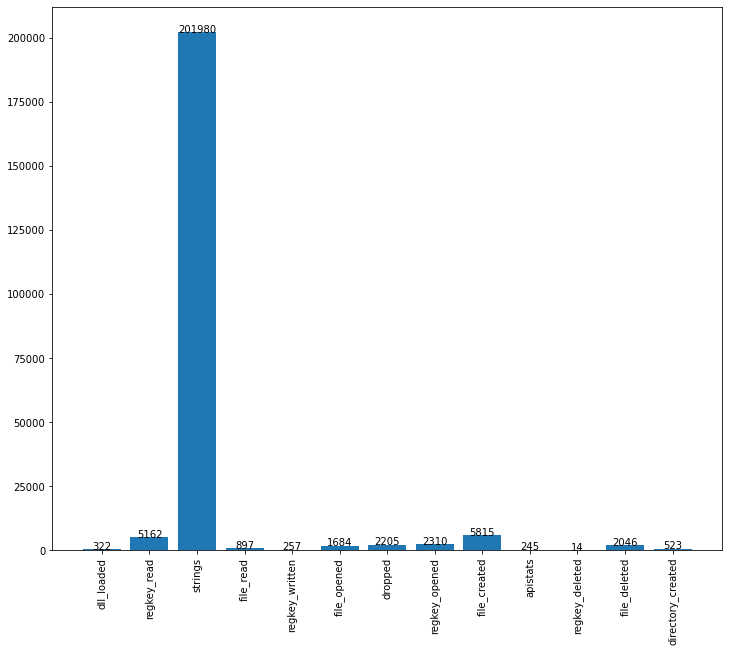

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
plt.bar(x, y)
for i, v in enumerate(y):
    plt.text(x[i], v, str(v),horizontalalignment="center")
plt.show()


In [2]:
ori_df.head()

,ID,Label,regkey_opened,regkey_read,regkey_written,regkey_deleted,file_created,file_opened,file_read,file_deleted,directory_created,dll_loaded,apistats,dropped,strings
0,0,1,[HKEY_LOCAL_MACHINE\System\CurrentControlSet\S...,[HKEY_LOCAL_MACHINE\SOFTWARE\MICROSOFT\Cryptog...,[HKEY_CURRENT_USER\Software\Temp\{F83C114F-4AD...,[],[],[C:\Users\newt\AppData\Local\Temp\VirusShare_0...,[C:\Users\newt\AppData\Local\Temp\VirusShare_0...,[C:\Users\newt\AppData\Local\Temp\VirusShare_0...,"[C:\Users\newt\AppData\Local\Temp, C:\Users\ne...","[ntmarta.dll, dwmapi.dll, urlmon.dll, CRYPTSP....","[CreateToolhelp32Snapshot, NtDuplicateObject, ...",[],"[!This program cannot be run in DOS mode., .rd..."
1,1,1,[HKEY_CLASSES_ROOT\PROTOCOLS\Name-Space Handle...,[HKEY_LOCAL_MACHINE\SOFTWARE\Wow6432Node\Micro...,[HKEY_CURRENT_USER\Software\Microsoft\Internet...,[HKEY_LOCAL_MACHINE\SOFTWARE\Wow6432Node\Micro...,[C:\Users\newt\AppData\Local\Microsoft\Windows...,"[C:\, C:\Users\newt\AppData\LocalLow\Microsoft...",[C:\Users\newt\AppData\LocalLow\Microsoft\Cryp...,"[C:\Users\newt\AppData\Local\Temp\Tar6518.tmp,...",[C:\Users\newt\AppData\Local\Microsoft\Windows...,"[C:\Windows\system32\kernel32.dll, API-MS-Win-...","[NtOpenSection, GetVolumePathNameW, WSARecv, g...","[0102db0fb8cc346e_newt@advertising[1].txt, 048...","[ARQCAAAAAADAAAAAAAAARg==, TAAAAA==, !This pro..."
2,2,1,[],[],[],[],[],[],[],[],[],[],[NtTerminateProcess],[],"[!This program cannot be run in DOS mode., Ric..."
3,3,1,[],[],[],[],[],[],[],[],[],[],[],[],"[!This program cannot be run in DOS mode., `.r..."
4,4,1,[],[],[],[],[],[],[],[],[],[],[NtTerminateProcess],[],"[!This program cannot be run in DOS mode., Ric..."


In [3]:
# creat new dict to save results
new_dict = {}

new_dict['ID'] = ori_df['ID']
new_dict['Label'] = ori_df['Label']

key_list = ['regkey_opened','regkey_read','regkey_written','regkey_deleted','file_created',
        'file_opened','file_read','file_deleted', 'directory_created','dll_loaded','apistats','dropped','strings']

for order in range(1, len(fea_csv['Index'])+1):
    new_dict[order] = [0] * len(ori_df['ID'])

for _, key_name in enumerate(key_list):
    for order, value_list in enumerate(ori_df[key_name]):
        if len(value_list) != 0:
            feature_keys = fea_csv[(fea_csv['Value'].isin(value_list)) & (fea_csv['Key'] == key_name)]['Index']
            # feature_key = fea_csv.query("Key=={} & Value=={}".format(key_name, v))['Index']
            for feature_key in feature_keys.values:
                new_dict[feature_key][order] += 1

In [4]:
df = pd.DataFrame.from_dict(new_dict, orient="columns")

df.to_csv("../dataset/features/data.csv")
# df.to_parquet("data.parquet", compression=None)


ValueError: parquet must have string column names

In [55]:
df.head()

,ID,Label,1,2,3,4,5,6,7,8,...,223451,223452,223453,223454,223455,223456,223457,223458,223459,223460
0,0,1,54,4,74,1,64,4,2,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,54,4,74,1,64,4,2,1,...,1,1,1,1,1,1,1,1,1,1
2,2,1,54,4,74,1,64,4,2,1,...,1,1,1,1,1,1,1,1,1,1
3,3,1,54,4,74,1,64,4,2,1,...,1,1,1,1,1,1,1,1,1,1
4,4,1,54,4,74,1,64,4,2,1,...,1,1,1,1,1,1,1,1,1,1
